In [1]:
# importo libreria

import pandas as pd

In [2]:
banco = pd.read_csv("banco.csv", ";")
banco.sample(5)

C:\Users\AndrésGarcíaFlores\AppData\Local\Temp\ipykernel_18640\2973624076.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  banco = pd.read_csv("banco.csv", ";")


,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
6858,6859,32,blue-collar,divorciado,secundaria/superiores,no,-289,si,no,NaN,161,12-jun-2021,2,-1,0,NaN,no
991,992,28,blue-collar,soltero,secundaria/superiores,no,416,si,no,NaN,452,13-may-2021,2,-1,0,NaN,no
38061,38062,48,blue-collar,casado,secundaria/superiores,no,387,si,no,fijo,76,28-jul-2021,18,-1,0,NaN,no
27379,27380,37,blue-collar,casado,secundaria/superiores,no,139,si,no,movil,412,18-may-2021,5,-1,0,NaN,no
43598,43599,39,management,casado,universitarios,no,0,si,no,movil,11,14-may-2021,15,261,38,sin_exito,no


In [5]:
#tratamos tema de nulos y duplicados
print(f"Hay un total de {banco.duplicated().sum()} duplicados")
print(f"Hay un total de {banco.isnull().sum().sum()} valores nulos")
banco.isnull().sum()
banco['tipo_contacto'].fillna('Sin especificar', inplace=True)
banco.drop(columns='resultado_campanas_anteriores',inplace=True)
banco.dropna(inplace=True)
print("\nDespues de eliminar los nulos, las columnas quedan así:")
banco.isnull().sum()

Hay un total de 0 duplicados
Hay un total de 50703 valores nulos

Despues de eliminar los nulos, las columnas quedan así:


ID                      0
edad                    0
trabajo                 0
estado_civil            0
educacion               0
deuda                   0
saldo                   0
vivienda                0
prestamo                0
tipo_contacto           0
duracion                0
fecha_contacto          0
campaign                0
tiempo_transcurrido     0
contactos_anteriores    0
target                  0
dtype: int64

In [56]:
#calculamos el total de profesiones que hay (eje Y)

profesion = banco["trabajo"].unique()
profesion

array(['blue-collar', 'services', 'student', 'management', 'admin.',
       'technician', 'self-employed', 'entrepreneur', 'retired',
       'unemployed', 'housemaid', 'unknown'], dtype=object)

In [57]:
#calculamos el numero de personas por profesion
npersonas = banco["trabajo"].value_counts()
npersonas

blue-collar      9076
management       9024
technician       7199
admin.           4910
services         3913
retired          2102
self-employed    1510
entrepreneur     1376
unemployed       1246
housemaid        1172
student           762
unknown           156
Name: trabajo, dtype: int64

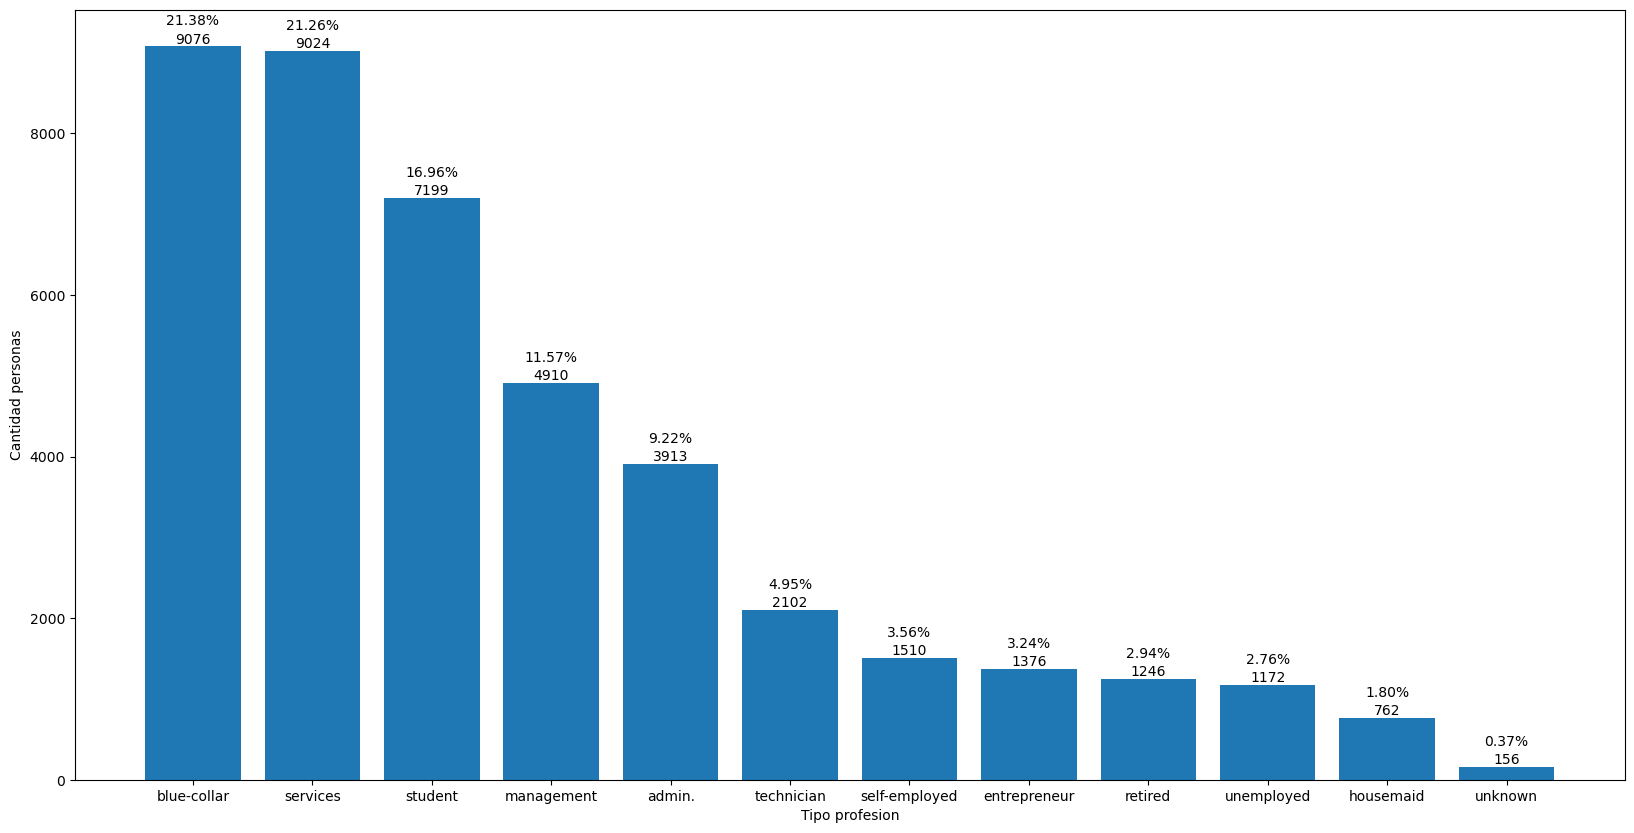

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize = [20,10])

plt.ylabel("Cantidad personas")
plt.xlabel("Tipo profesion")

# total personas por barra
for i in range(len(profesion)):
    plt.text(i, npersonas[i], str(npersonas[i]), ha='center', va='bottom')

#% de personas
total_personas = sum(npersonas)
for i in range(len(profesion)):
    porcentaje = (npersonas[i] / total_personas) * 100
    plt.text(i, npersonas[i]+400, f'{porcentaje:.2f}%', ha='center', va='top')

plt.bar(profesion,npersonas)

plt.show()